In [1]:
import gmplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from colour import Color

from os import listdir
from os.path import isfile, join

760028711
760038246

In [2]:
def replaceFileClean(file):
    with open(file, "r") as f:
        lines = f.readlines()
        alreadyFirst=False
        indexesToPop = []
        for i,line in enumerate(lines):
            if ";Date;Timestamp" in line:
                if alreadyFirst:
                    indexesToPop.append(i)
                else:
                    alreadyFirst=True
        indexesToPop.reverse()
        for i in indexesToPop:
            lines.pop(i)
    os.remove(file)
    with open(file, 'w') as f:
        for line in lines:
            f.write(line)

In [3]:
def read_and_clean_data(file_path):
    """Read data from CSV file and clean columns."""
    data = pd.read_csv(file_path, sep=",")
    data.columns = ["Date", "Timestamp", "Longitude", "Latitude", "p1", "p2", "p3", "p4"]
    data['Date'] = pd.to_datetime(data['Date'], unit='s', errors='coerce')
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', errors='coerce')
    return data

def scale_columns(data, columns):
    """Scale specified columns by multiplying with 100."""
    for col in columns:
        data[col] *= 100

def create_map_plotter(data):
    """Create GoogleMapPlotter object."""
    initial_lat = data.iloc[0].Latitude
    initial_lon = data.iloc[0].Longitude
    return gmplot.GoogleMapPlotter(initial_lat, initial_lon, 10, apikey="--GMAPS-KEY--")

def filter_data_and_plot_histogram(data):
    """Filter data and plot histogram."""
    varToPlot = "p1"  # Variable to plot histogram for
    data[varToPlot] = data[varToPlot] > 30
    data[data[varToPlot] > 2][varToPlot].hist(bins=30)

def create_color_gradient(data):
    """Create color gradient based on a variable."""
    varToPlot = "p1"  # Variable to use for color gradient
    green = Color("green")
    maxValue = int(data[varToPlot].max()) + 1
    colors = list(green.range_to(Color("red"), maxValue))
    return [str(colors[int(c)].hex_l) for c in data[varToPlot]]

def plot_data_on_map(gmap, data, colors):
    """Plot data on the map."""
    start = 0
    amount = 20000
    gmap.scatter(data.Latitude[start:start + amount], data.Longitude[start:start + amount],
                 color=colors[start:start + amount], size=800, marker=False, alpha=0.3)
    gmap.plot(data.Latitude[start:start + amount], data.Longitude[start:start + amount], color='#444444')

def save_map_plot(gmap, file_path):
    """Save the map plot to an HTML file."""
    gmap.draw(f'Map_Predictions_{file_path.split("_")[-2]}.html')

In [4]:
def generateMap(mmsiFile1):

    # Replace file with clean version
    replaceFileClean(mmsiFile1)
    
    # Read data from file and clean columns
    data1 = read_and_clean_data(mmsiFile1)
    
    # Scale columns p1, p2, p3, p4
    scale_columns(data1, ["p1", "p2", "p3", "p4"])

    # Create the map plotter
    gmap = create_map_plotter(data1)

    # Filter data and plot histogram
    filter_data_and_plot_histogram(data1)

    # Create color gradient
    colors = create_color_gradient(data1)

    # Plot data on map
    plot_data_on_map(gmap, data1, colors)

    # Draw the map
    save_map_plot(gmap, mmsiFile1)

predictions_path/440686000_2022_02_predictions.txt


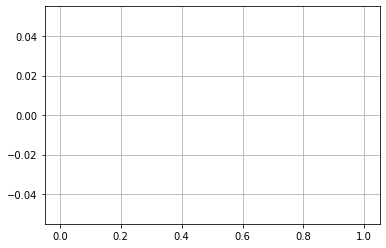

In [5]:
mmsi = "1234"
varToPlot="p1"


pathRaw="predictions_path/"
onlyfiles = [join(pathRaw, f) for f in listdir(pathRaw) if isfile(join(pathRaw, f)) and mmsi in f]
for file in onlyfiles:
    print(file)
    generateMap(file)